In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from xgboost import plot_importance

try:
    df = pd.read_csv('parkinsons.data')
    print("Файл загружен из parkinsons.data")
except FileNotFoundError:
    try:
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
        df = pd.read_csv(url)
        print("Файл загружен с UCI репозитория")
    except Exception as e:
        print("Не удалось загрузить данные. Ошибка:", e)
        raise

Файл загружен с UCI репозитория


In [12]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [14]:
features = df.loc[:, df.columns != 'status'].values[:, 1:]
labels = df.loc[:, 'status'].values

In [22]:
print("\nРаспределение классов:")
print(f"Болезнь Паркинсона (1): {sum(labels == 1)}")
print(f"Здоровые (0): {sum(labels == 0)}")


Распределение классов:
Болезнь Паркинсона (1): 147
Здоровые (0): 48


In [24]:
scaler = MinMaxScaler((-1, 1))
x = scaler.fit_transform(features)
y = labels

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [30]:
model = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    objective='binary:logistic',
    random_state=0
)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [36]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)


94.87179487179486


<Figure size 1000x800 with 0 Axes>

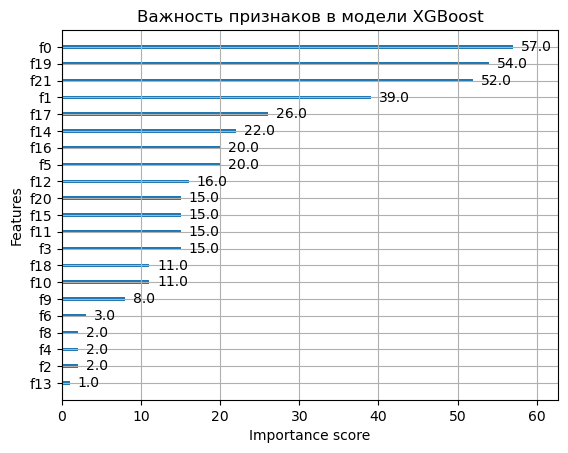

In [42]:
plt.figure(figsize=(10, 8))
plot_importance(model)
plt.title('Важность признаков в модели XGBoost')
plt.show()

In [52]:
example_idx = 12
example = x_test[example_idx].reshape(1, -1)
true_label = y_test[example_idx]
pred_label = model.predict(example)[0]

print(f"\nПример тестового случая {example_idx}:")
print(f"Истинный статус: {'Болен' if true_label == 1 else 'Здоров'}")
print(f"Предсказанный статус: {'Болен' if pred_label == 1 else 'Здоров'}")
print(f"Вероятности: {model.predict_proba(example)}")


Пример тестового случая 12:
Истинный статус: Болен
Предсказанный статус: Болен
Вероятности: [[0.001616 0.998384]]
